In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import csv
import pandas as pd
import matplotlib as mpl
from util.stragglers import straggler_freq,task_hist,straggler_samples
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True

blues = cm.get_cmap(plt.get_cmap('Blues'))
greens = cm.get_cmap(plt.get_cmap('Greens'))
reds = cm.get_cmap(plt.get_cmap('Reds'))
oranges = cm.get_cmap(plt.get_cmap('Oranges'))
purples = cm.get_cmap(plt.get_cmap('Purples'))

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
wrangler_rp_jan6 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_rp_NoIO.csv').drop(['Framework'],axis=1)
wrangler_rp_jan15 = pd.DataFrame.from_csv('stragglers/tidy_data/StrongScaling/wrangler_rp_NoIOapp.csv').drop(['Framework'],axis=1)

In [3]:
histWranglerRp1,edgesWranglerRp1,meanWranglerRp1,stdWranglerRp1,maxValueWranglerRpMax1,_ = task_hist(df=wrangler_rp_jan6,node=1,bins=20)
histWranglerRp2,edgesWranglerRp2,meanWranglerRp2,stdWranglerRp2,maxValueWranglerRpMax2,_ = task_hist(df=wrangler_rp_jan6,node=2,bins=40)
histWranglerRp3,edgesWranglerRp3,meanWranglerRp3,stdWranglerRp3,maxValueWranglerRpMax3,_ = task_hist(df=wrangler_rp_jan6,node=3,bins=80)

widthWranglerRp1 = 0.9 * (edgesWranglerRp1[1] - edgesWranglerRp1[0])
centerWranglerRp1 = (edgesWranglerRp1[:-1] + edgesWranglerRp1[1:]) / 2

widthWranglerRp2 = 0.9 * (edgesWranglerRp2[1] - edgesWranglerRp2[0])
centerWranglerRp2 = (edgesWranglerRp2[:-1] + edgesWranglerRp2[1:]) / 2

widthWranglerRp3 = 0.9 * (edgesWranglerRp3[1] - edgesWranglerRp3[0])
centerWranglerRp3 = (edgesWranglerRp3[:-1] + edgesWranglerRp3[1:]) / 2

In [4]:
hist2WranglerRp1,edges2WranglerRp1,mean2WranglerRp1,std2WranglerRp1,max2ValueWranglerRpMax1,_ = task_hist(df=wrangler_rp_jan15,node=1,bins=20)
hist2WranglerRp2,edges2WranglerRp2,mean2WranglerRp2,std2WranglerRp2,max2ValueWranglerRpMax2,_ = task_hist(df=wrangler_rp_jan15,node=2,bins=40)
hist2WranglerRp3,edges2WranglerRp3,mean2WranglerRp3,std2WranglerRp3,max2ValueWranglerRpMax3,_ = task_hist(df=wrangler_rp_jan15,node=3,bins=80)

width2WranglerRp1 = 0.9 * (edges2WranglerRp1[1] - edges2WranglerRp1[0])
center2WranglerRp1 = (edges2WranglerRp1[:-1] + edges2WranglerRp1[1:]) / 2

width2WranglerRp2 = 0.9 * (edges2WranglerRp2[1] - edges2WranglerRp2[0])
center2WranglerRp2 = (edges2WranglerRp2[:-1] + edges2WranglerRp2[1:]) / 2

width2WranglerRp3 = 0.9 * (edges2WranglerRp3[1] - edges2WranglerRp3[0])
center2WranglerRp3 = (edges2WranglerRp3[:-1] + edges2WranglerRp3[1:]) / 2

# Executing RP with the same configuration on different days

I executed a Strong scaling experimnt with RP on Wrangler. The experiment setup is the following:
    1. Used ORTE and run with 1 up to 3 nodes.
    2. Each core per node is assigned only one task.
    3. The total dataset is distributed over the tasks. That means that there are in total 2512200 frames in total. This constant number is used on all node counts and it is *equally* distributed over the tasks.
    4. The experiment was repeated 10 times.
    

The figures below show the CU execution times histograms, based on the profiling events `exec_start` and `exec_stop`, on two different days. 

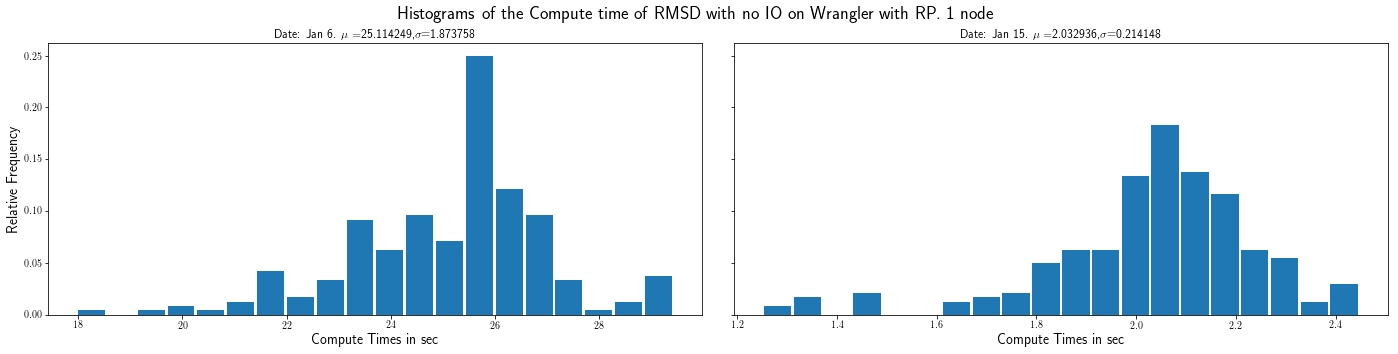

In [5]:
fig,axes = plt.subplots(nrows=1,ncols=2, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerRp1, histWranglerRp1, align='center', width=widthWranglerRp1)
axes[1].bar(center2WranglerRp1, hist2WranglerRp1, align='center', width=width2WranglerRp2)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with RP. 1 node',fontsize=18)
axes[0].set_title('Date: Jan 6. $\mu=$%f,$\sigma$=%f'%(meanWranglerRp1,stdWranglerRp1),fontsize=12)
axes[1].set_title('Date: Jan 15. $\mu=$%f,$\sigma$=%f'%(mean2WranglerRp1,std2WranglerRp1),fontsize=12)
axes[0].set_xlabel('Compute Times in sec', fontsize=14)
axes[1].set_xlabel('Compute Times in sec',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)

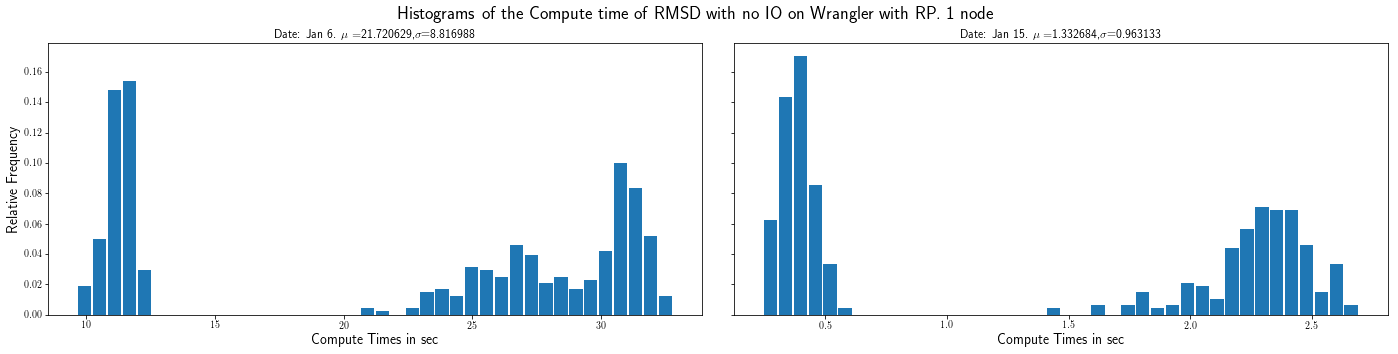

In [6]:
fig,axes = plt.subplots(nrows=1,ncols=2, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerRp2, histWranglerRp2, align='center', width=widthWranglerRp1)
axes[1].bar(center2WranglerRp2, hist2WranglerRp2, align='center', width=width2WranglerRp2)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with RP. 1 node',fontsize=18)
axes[0].set_title('Date: Jan 6. $\mu=$%f,$\sigma$=%f'%(meanWranglerRp2,stdWranglerRp2),fontsize=12)
axes[1].set_title('Date: Jan 15. $\mu=$%f,$\sigma$=%f'%(mean2WranglerRp2,std2WranglerRp2),fontsize=12)
axes[0].set_xlabel('Compute Times in sec', fontsize=14)
axes[1].set_xlabel('Compute Times in sec',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)

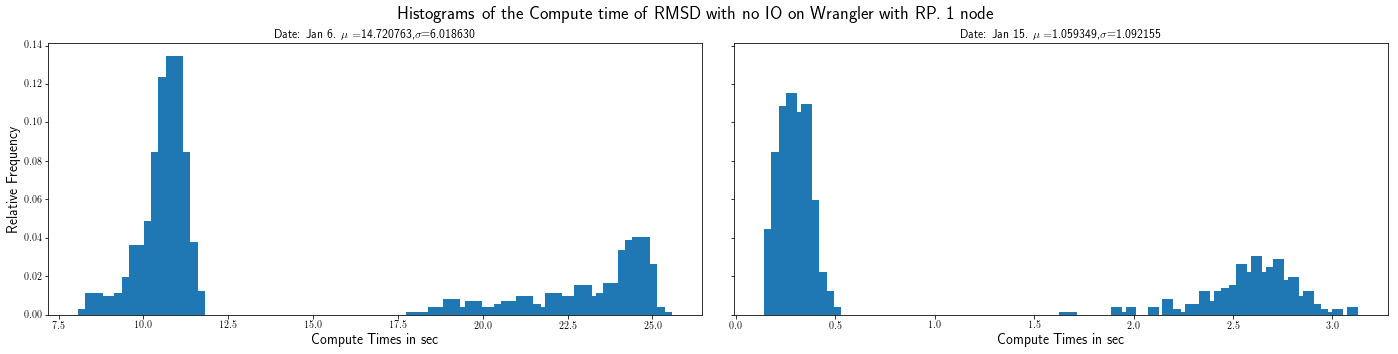

In [7]:
fig,axes = plt.subplots(nrows=1,ncols=2, sharex=False,sharey=True,figsize=[24,5],gridspec_kw={'wspace':0.05, 'hspace':0.05})
axes[0].bar(centerWranglerRp3, histWranglerRp3, align='center', width=widthWranglerRp1)
axes[1].bar(center2WranglerRp3, hist2WranglerRp3, align='center', width=width2WranglerRp2)
fig.suptitle('Histograms of the Compute time of RMSD with no IO on Wrangler with RP. 1 node',fontsize=18)
axes[0].set_title('Date: Jan 6. $\mu=$%f,$\sigma$=%f'%(meanWranglerRp3,stdWranglerRp3),fontsize=12)
axes[1].set_title('Date: Jan 15. $\mu=$%f,$\sigma$=%f'%(mean2WranglerRp3,std2WranglerRp3),fontsize=12)
axes[0].set_xlabel('Compute Times in sec', fontsize=14)
axes[1].set_xlabel('Compute Times in sec',fontsize=14)
axes[0].set_ylabel('Relative Frequency',fontsize=14)